# Analyzing the ticket "GME" - GameStop Corp

## Introduction
According to the [Wikipedia](https://en.wikipedia.org/wiki/GameStop):
>GameStop Corp. is an American video game, consumer electronics, and gaming merchandise retailer.The company is headquartered in Grapevine, Texas (a suburb of Dallas), and is the largest video game retailer worldwide. As of January 30, 2021, the company operated 4,816 stores including 3,192 in the United States, 253 in Canada, 417 in Australia and 954 in Europe under the GameStop, EB Games, ThinkGeek, and Micromania-Zing brands.The company was founded in Dallas in 1984 as Babbage's, and took on its current name in 1999. The company's performance declined during the mid-late 2010s due to the shift of video game sales to online shopping and downloads and failed investments by GameStop in smartphone retail.

>In 2021, the company's stock price skyrocketed due to a short squeeze orchestrated by users of the Internet forum r/wallstreetbets causing loses of thousands million dollars to Hedge Funds who had shorted the stock, meaning they bet against it and needed it to drop in price in order for their investments to be successful. The company received significant media attention during January and February 2021 due to the volatility of its stock price and the GameStop short squeeze.

---
## Table of Contents:
+ General Analisys
  1. Term Usages per subreddit
  2. Up Vote Ration in each subreddit
  3. Numer of posts related to the term over time
  4. Comparison between close price and number of posts 
+ Sentiment Analisys
  1. Overall distribution of sentiments
  2. Sentiment per subReddit
  3. Mean awards and upVotes
  4. Sentiment over time
  5. Sentiment and the stock market

### Loading dataset

In [1]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine("sqlite:///db/reddit_financial.db")
df = pd.read_sql_query(
    "SELECT * FROM reddit_data WHERE title LIKE '%gme%' OR title LIKE '%GameStop%'OR selftext LIKE '%gme%' OR selftext LIKE '%GameStop%'",
    con=engine,
    parse_dates=[
        'created',
        'retrieved',
        'edited',
    ],
    index_col = "id"
)

In [2]:
df.head()

,author,created,retrieved,edited,pinned,archived,locked,removed,deleted,is_self,...,num_comments,num_crossposts,selftext,thumbnail,shortlink,subReddit,SentimentAFINN_body,SentimentAFINN_class_body,SentimentAFINN_title,SentimentAFINN_class_title
id,,,,,,,,,,,,,,,,,,,,,
kqvp7l,TitsDownOnly,2021-01-05 10:19:59,2021-02-28 16:51:20,1970-01-01,0,0,0,0,0,1,...,5,0,guy explain exactly take position ca nt go tit...,self,https://redd.it/kqvp7l,gme,3.0,positive,1.0,positive
kuo3w1,TitsDownOnly,2021-01-10 21:59:17,2021-02-28 16:51:20,1970-01-01,0,0,0,0,0,1,...,12,0,downward movehement think everybody need good ...,self,https://redd.it/kuo3w1,gme,5.0,positive,3.0,positive
kv1w9e,username-__-taken,2021-01-11 12:42:49,2021-02-28 16:51:20,1970-01-01,0,0,0,0,0,1,...,19,0,guysss retard fantasize long time finally happ...,self,https://redd.it/kv1w9e,gme,-4.0,negative,0.0,neutral
kv671o,IsaacPG,2021-01-11 16:34:48,2021-02-28 16:51:20,1970-01-01,0,0,0,0,0,1,...,11,0,skim agreehement read pursuant agreehement new...,self,https://redd.it/kv671o,gme,3.0,positive,-1.0,negative
kvw83z,johnestar,2021-01-12 17:31:24,2021-02-28 16:51:20,1970-01-01,0,0,0,0,0,1,...,8,0,hi investor interested buy stock really high s...,self,https://redd.it/kvw83z,gme,4.0,positive,0.0,neutral


In [3]:
df.shape

(50301, 28)

## General Analisys
In this first part, we are going to analyze quantitative data related to the term.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

### Term Usages per subreddit

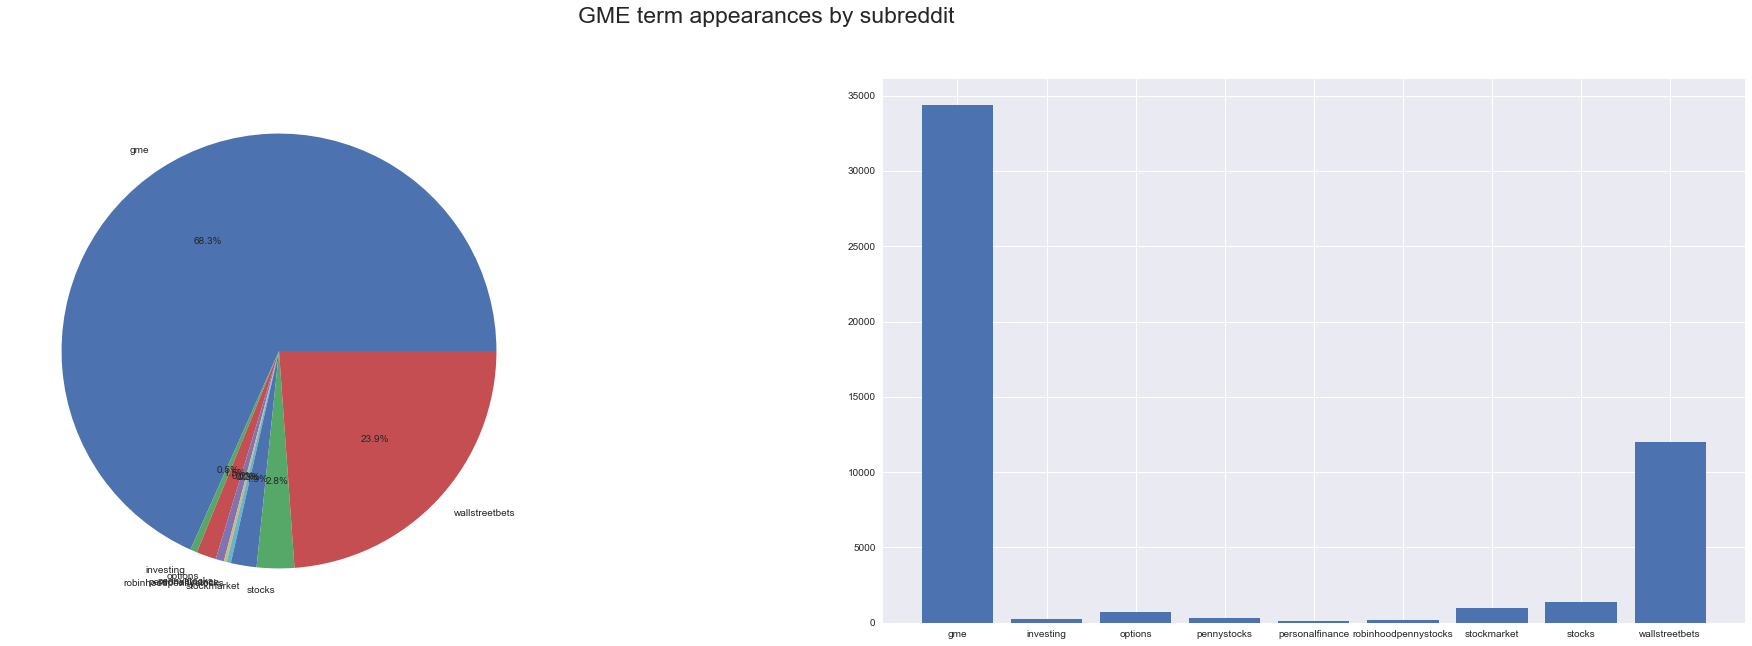

In [5]:
#Number of term usages in each subreddit
subreddits = df.subReddit.unique()
subreddits_count = []
explode = []
for key in subreddits:
    size = len(df[df["subReddit"] == key])
    subreddits_count.append(size)

#Plotting
plt.style.use('seaborn')

fig, axs = plt.subplots(1,2,figsize=(34,10))
fig.suptitle("GME term appearances by subreddit",size=23)

axs[0].pie(subreddits_count,labels=subreddits,autopct='%1.1f%%')
axs[1].bar(subreddits,subreddits_count)

plt.show()

### Up Vote Ration in each subreddit

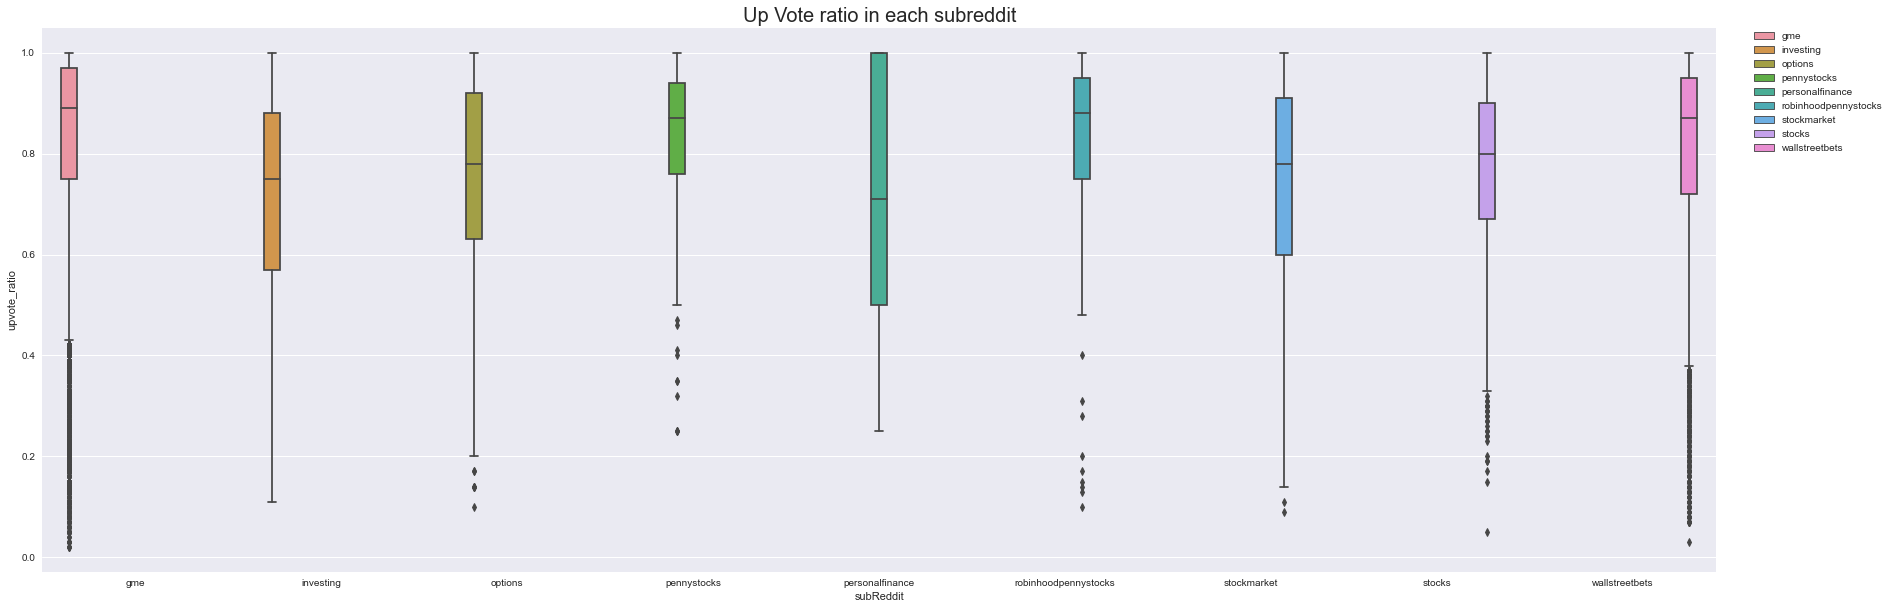

In [9]:
#Up Vote ratio in each subreddit
plt.figure(figsize=(30,10))
sns.boxplot(data=df,x="subReddit",y='upvote_ratio',hue="subReddit")
plt.title("Up Vote ratio in each subreddit",size=20)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

#### Numer of posts related to the term over time

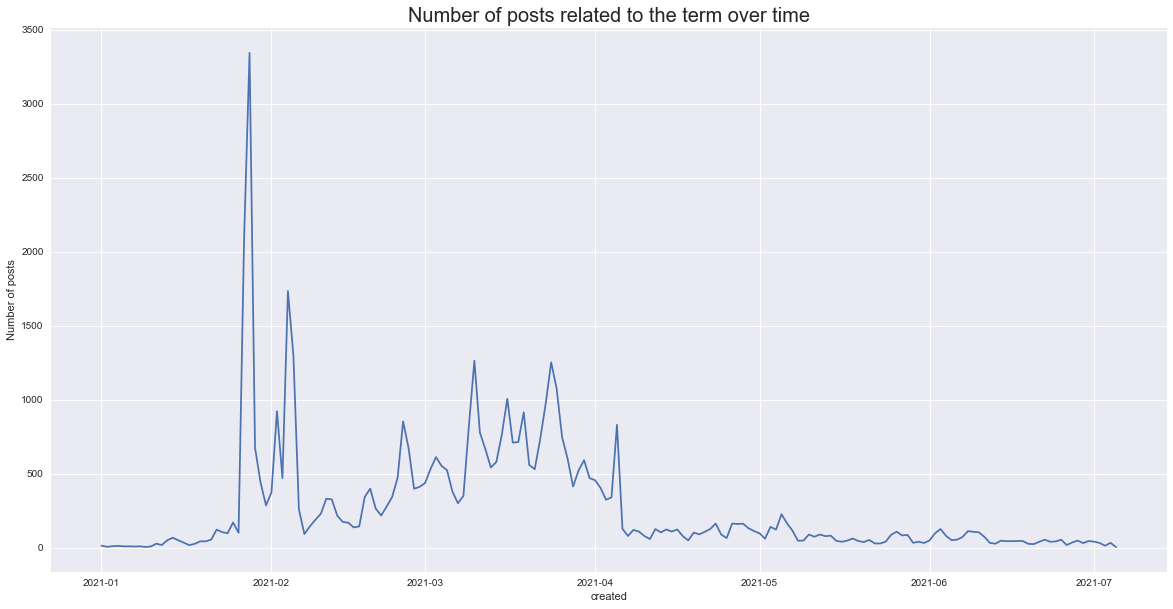

In [8]:
#Occorencies over time

#Cleaning timestamp to achieve a better grouping
df['created'] = pd.to_datetime(df['created']).dt.normalize()


posts_byData = df.groupby('created').count()

plt.figure(figsize=(20,10))
sns.lineplot(data=posts_byData,x="created",y="retrieved")
plt.title("Number of posts related to the term over time",size=20)
plt.ylabel("Number of posts")
plt.show()

In [9]:
posts_byData.head()

,author,retrieved,edited,pinned,archived,locked,removed,deleted,is_self,is_video,...,num_comments,num_crossposts,selftext,thumbnail,shortlink,subReddit,SentimentAFINN_body,SentimentAFINN_class_body,SentimentAFINN_title,SentimentAFINN_class_title
created,,,,,,,,,,,,,,,,,,,,,
2021-01-01,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
2021-01-02,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
2021-01-03,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
2021-01-04,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
2021-01-05,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


In [26]:
#Comparing to the stock-market data
import yfinance as yf

start_date = min(df.created)
end_date = max(df.created)

#Using yahoo API
gmeDATA = yf.download(["GME"], start=start_date, end=end_date)



[*********************100%***********************]  1 of 1 completed


#### Comparison between close price and number of posts 

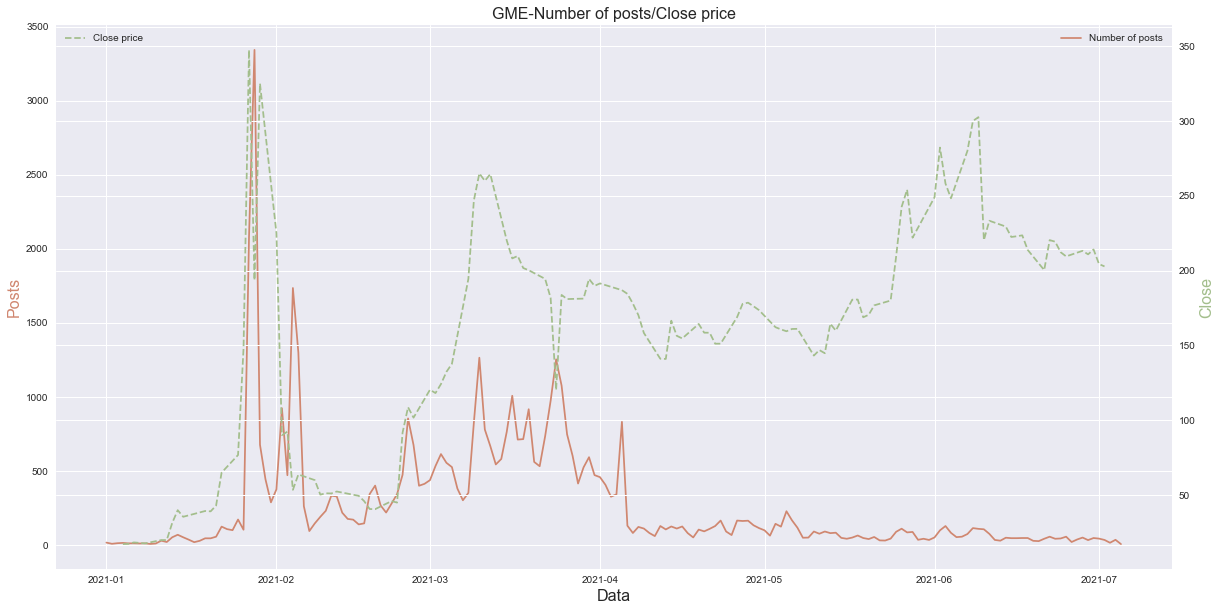

In [27]:
#Comparing close price

fig, ax1 = plt.subplots(figsize=(20,10))

#First Graph
ax1.set_title('GME-Number of posts/Close price', fontsize=16)
ax1.set_xlabel('Data', fontsize=16)
ax1.set_ylabel('Posts', fontsize=16,color="#D08770")

ax1 = sns.lineplot(data=posts_byData,x="created",y="retrieved",color="#D08770",label="Number of posts")
ax1.tick_params(axis='y')

#Second Graph
ax2 = ax1.twinx()

ax2.set_ylabel('Close', fontsize=16,color="#A3BE8C")
ax2 = sns.lineplot(data=gmeDATA,x="Date",y="Close",label="Close price",color="#A3BE8C")
ax2.tick_params(axis='y')
ax2.lines[0].set_linestyle("--")

#Display
plt.legend(loc='upper left')
plt.show()




## Sentiment Analysis
The AFFIN library was used to both analyze and classify all posts and titles. 
In this next topic, we are going to analyze this data.

### Overall distribution of sentiments

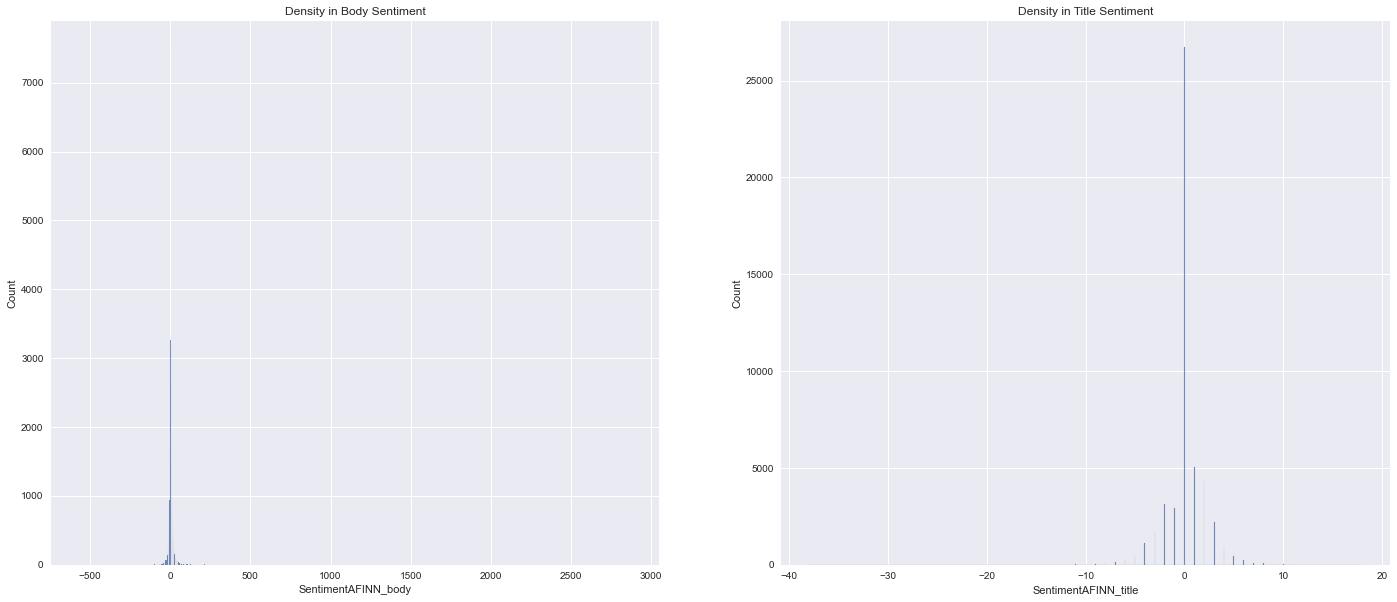

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(24,10))
sns.histplot(df.SentimentAFINN_body, label = 'polarity', ax=axs[0]);
sns.histplot(df.SentimentAFINN_title, label = 'polarity', ax=axs[1]);
axs[0].title.set_text('Density in Body Sentiment');
axs[1].title.set_text('Density in Title Sentiment');
plt.show()

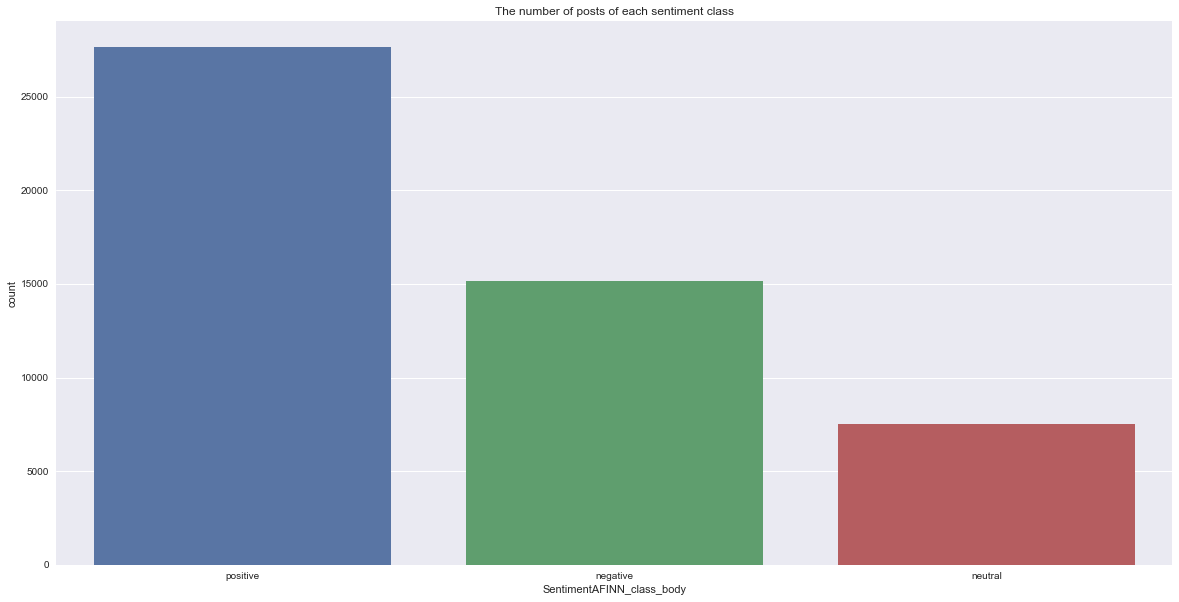

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x='SentimentAFINN_class_body', data=df);
plt.title("The number of posts of each sentiment class")
plt.show()

### Sentiment per subReddit

Text(0.5, 1.0, 'Post Sentiment per subReddit')

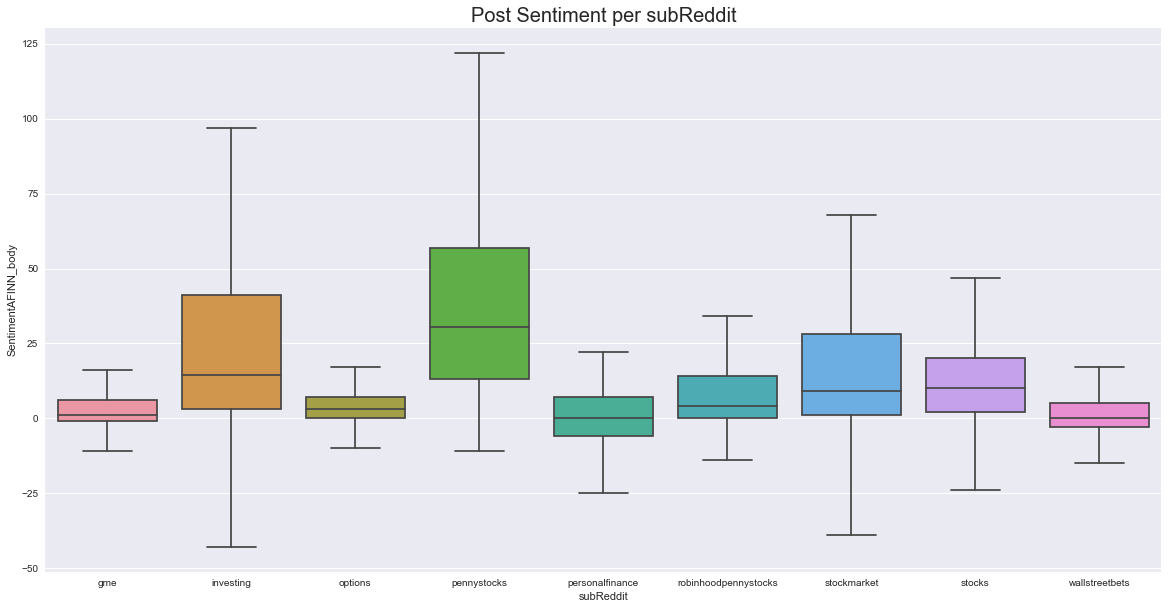

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(x="subReddit",y="SentimentAFINN_body",data=df, showfliers = False)
plt.title("Post Sentiment per subReddit",size=20)

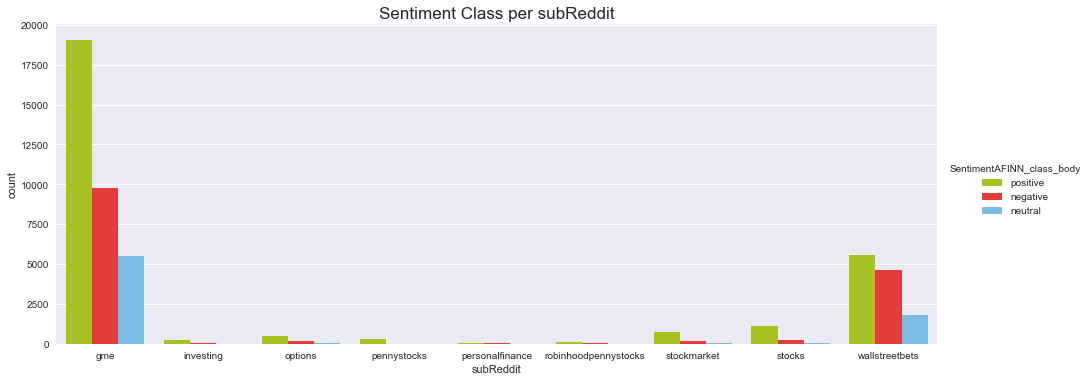

In [15]:
sns.catplot(x="subReddit", hue="SentimentAFINN_class_body", data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"}, aspect=21.7/8.27)
plt.title("Sentiment Class per subReddit",size=17)
plt.show()

### Mean awards and upVotes

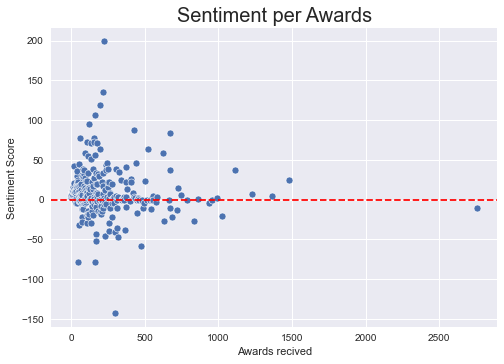

In [16]:
mean_TotalAwards = df.groupby('total_awards_received').mean()
sns.scatterplot(x=mean_TotalAwards.index, y="SentimentAFINN_body", data=mean_TotalAwards)
plt.axhline(y=0, color='r', linestyle='--');
plt.title("Sentiment per Awards",size=20)
plt.xlabel("Awards recived")
plt.ylabel("Sentiment Score")
plt.show()

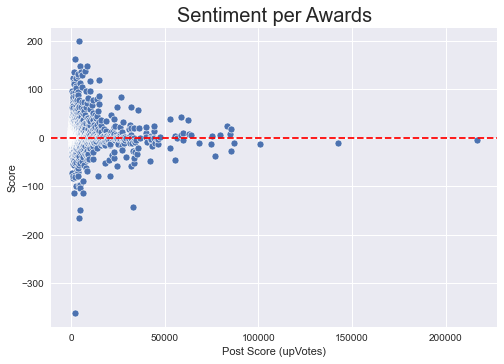

In [17]:
mean_TotalAwards = df.groupby('score').mean()
sns.scatterplot(x=mean_TotalAwards.index, y="SentimentAFINN_body", data=mean_TotalAwards)
plt.axhline(y=0, color='r', linestyle='--');
plt.title("Sentiment per Awards",size=20)
plt.xlabel("Post Score (upVotes)")
plt.ylabel("Score")
plt.show()

### Sentiment over time 

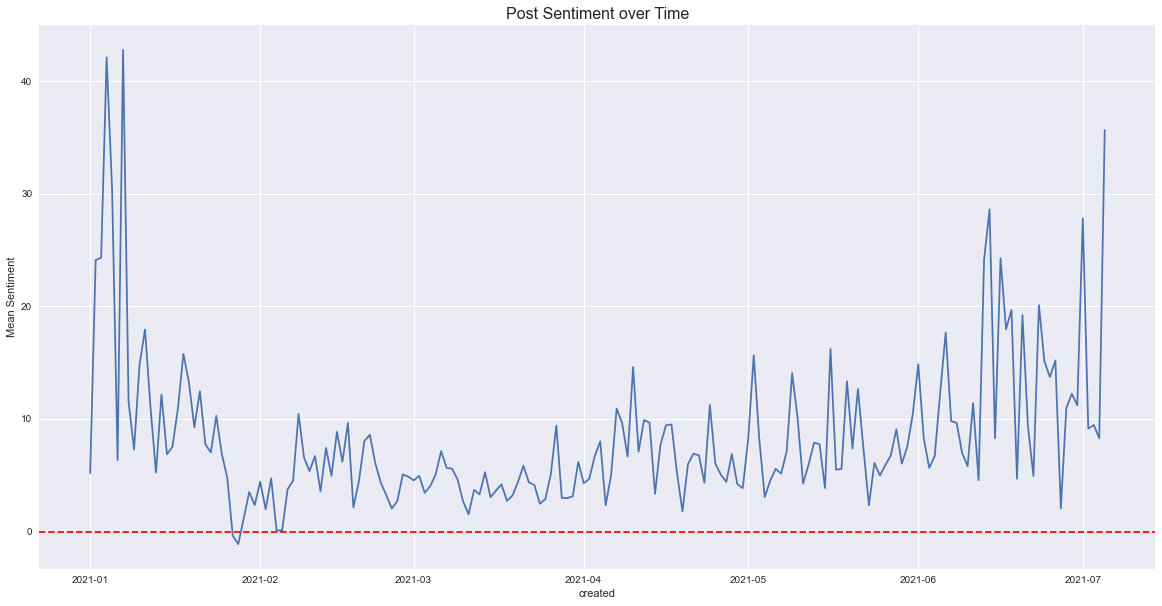

In [18]:
plt.figure(figsize=(20,10))
mean_sentiments = df.groupby('created').mean()
sns.lineplot(data=mean_sentiments,x="created",y="SentimentAFINN_body")
plt.axhline(y=0, color='r', linestyle='--');
plt.title("Post Sentiment over Time",size=16)
plt.ylabel("Mean Sentiment")
plt.show()


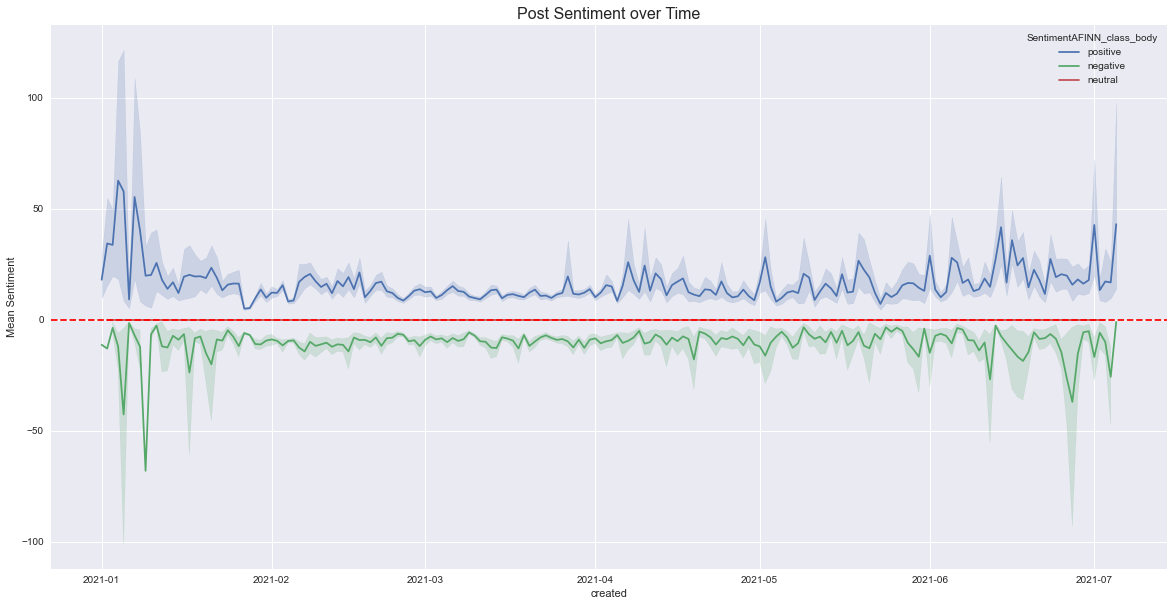

In [19]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="created",y="SentimentAFINN_body",hue="SentimentAFINN_class_body")
plt.axhline(y=0, color='r', linestyle='--');
plt.title("Post Sentiment over Time",size=16)
plt.ylabel("Mean Sentiment")
plt.show()


### Sentiment and the stock market

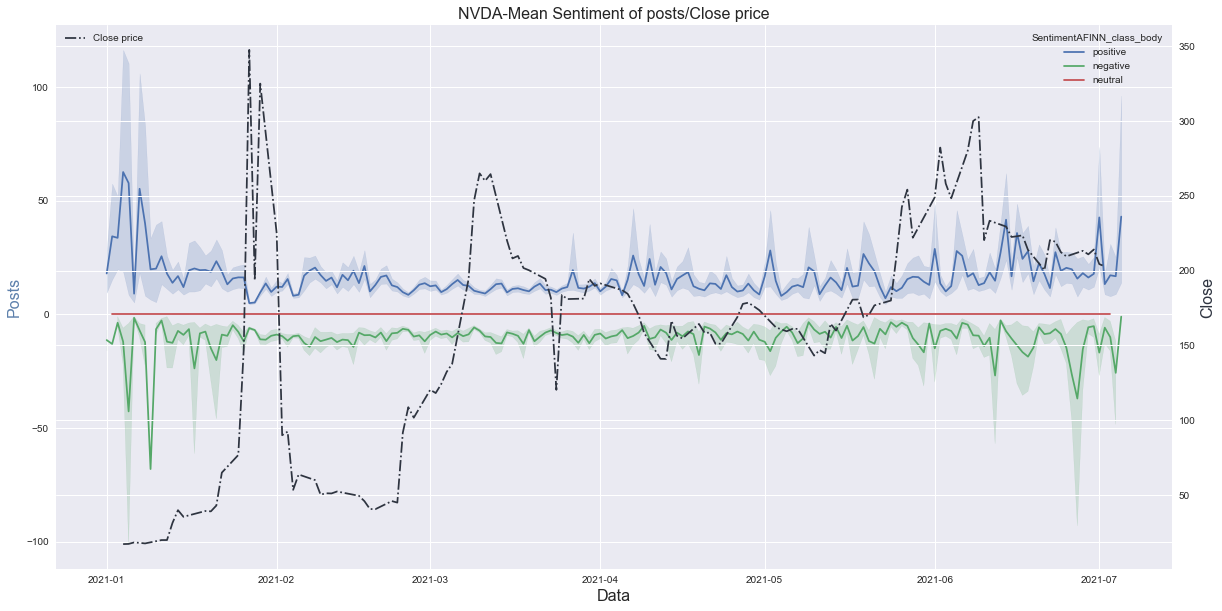

In [29]:
#Comparing close price

fig, ax1 = plt.subplots(figsize=(20,10))

#First Graph
ax1.set_title('NVDA-Mean Sentiment of posts/Close price', fontsize=16)
ax1.set_xlabel('Data', fontsize=16)
ax1.set_ylabel('Posts', fontsize=16,color="#5E81AC")

ax1 = sns.lineplot(data=df,x="created",y="SentimentAFINN_body",hue="SentimentAFINN_class_body")
ax1.tick_params(axis='y')

#Second Graph
ax2 = ax1.twinx()

ax2.set_ylabel('Close', fontsize=16,color="#2E3440")
ax2 = sns.lineplot(data=gmeDATA,x="Date",y="Close",label="Close price",color="#2E3440")
ax2.tick_params(axis='y')
ax2.lines[0].set_linestyle("dashdot")

#Display
plt.legend(loc='upper left')
plt.show()

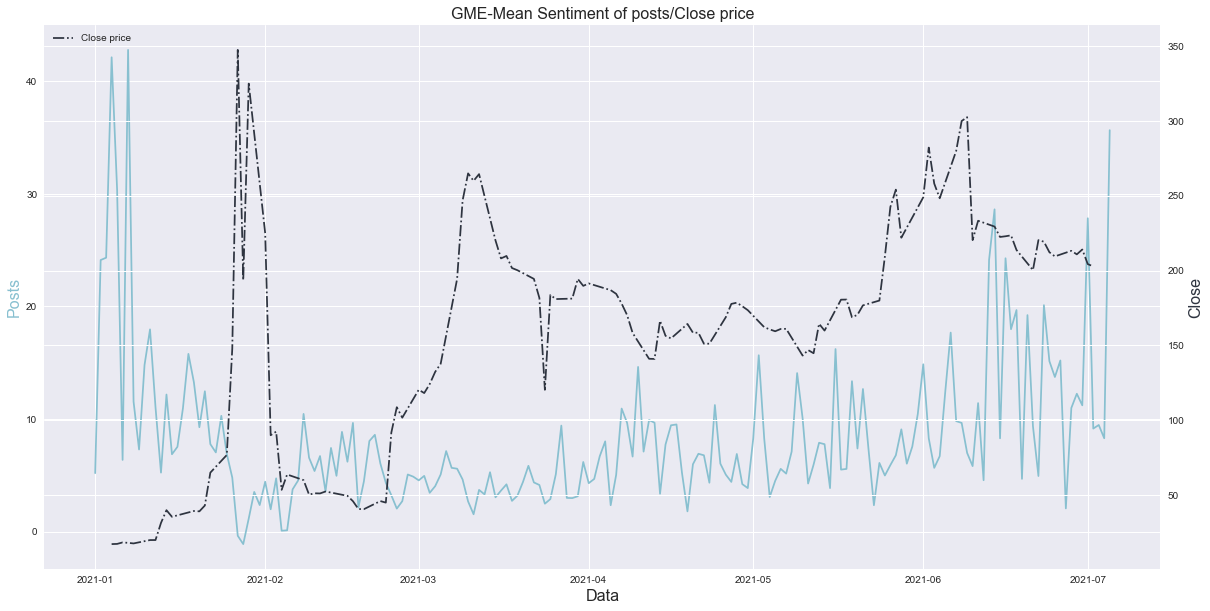

In [31]:
#Comparing close price

fig, ax1 = plt.subplots(figsize=(20,10))

#First Graph
ax1.set_title('GME-Mean Sentiment of posts/Close price', fontsize=16)
ax1.set_xlabel('Data', fontsize=16)
ax1.set_ylabel('Posts', fontsize=16,color="#88C0D0")

ax1 = sns.lineplot(data=mean_sentiments,x="created",y="SentimentAFINN_body",color="#88C0D0")
ax1.tick_params(axis='y')

#Second Graph
ax2 = ax1.twinx()

ax2.set_ylabel('Close', fontsize=16,color="#2E3440")
ax2 = sns.lineplot(data=gmeDATA,x="Date",y="Close",label="Close price",color="#2E3440")
ax2.tick_params(axis='y')
ax2.lines[0].set_linestyle("dashdot")

#Display
plt.legend(loc='upper left')
plt.show()